<a href="https://colab.research.google.com/github/davideandres95/ml_comm/blob/main/tut10.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## Tutorial 10 - Deterministic Channel Modelling
13.01.2022

In this promblem set, we consider the non-linear channel

$$Y = f(X) = tanh(X) + Z $$

where $Z$ is zero mean Gaussian with variance $\sigma^2 = 0.007$. We model the channel by

$$\hat{Y} = g(X) + \hat{Z} $$

where $g$ is a deterministic function and $\hat{Z}$ zero mean Gaussian with variance $\hat{\sigma}^2$.

In [ ]:
import numpy as np
import torch
from torch import nn, optim
import matplotlib.pyplot as plt

### Problem 8.2 - Linear model


* 1. Implement $g$ as a linear neuron.
* 2. Use the 4-ASK alphabet $X = \{-3, -1, 1, 1, 3 \}$. Sample $\tilde{x}^n = \tilde{x}_0 \dots \tilde{x}_{n-1}$ uniformly from $\mathcal{x}$ and generate the input and output sequences 

$$x^n = 0.2 \cdot \tilde{x}^n, \hspace{1cm} y_i = f(x_i), \hspace{1cm} i = 0, \dots, n-1 $$ 

Train your linear model $g$ using $x^n$ as input and $y^n$ as target output using the MSE loss function on $g(x^n)$ and $y^n$.
* 3. For your trained model, plot $g(x)$ and $tanh(x)$ for $x \in  [-2, 2]$. In which range of $x$ does $g$ approximate tanh well?

In [ ]:
def tanh_channel(x, sigma2):
    noise = np.sqrt(sigma2) * np.random.randn(*x.shape)
    return np.tanh(x) + noise

In [ ]:
def train_model(model, x, y):
    batch_size = 100
    num_epochs = 10
    lr = 0.001

    optimizer = optim.Adam(model.parameters(), lr=lr)
    loss_fn = nn.MSELoss()

    x_t = torch.Tensor(x)
    y_t = torch.Tensor(y)

    dataloader = torch.utils.data.DataLoader(x_t, batch_size=batch_size)
    labelloader = torch.utils.data.DataLoader(y_t, batch_size=batch_size)

    for i in range(num_epochs):
        for xi, yi in zip(dataloader, labelloader):
            yhat = model(xi.reshape(-1, 1)).reshape(-1)
            loss = loss_fn(yi, yhat)
            optimizer.zero_grad()
            loss.backward()
            optimizer.step()
        print(f"Epoch {i}: loss={loss :.4f}")

In [ ]:
linear_channel = nn.Linear(1, 1, bias=False)
sigma2 = 0.007

n = 100_000
alphabet = np.array([-3, -1, 1, 3])
x = np.random.choice(alphabet, n)
gain = 0.5

y = tanh_channel(gain * x, sigma2)

train_model(linear_channel, gain*x, y)

Epoch 0: loss=0.0198
Epoch 1: loss=0.0197
Epoch 2: loss=0.0197
Epoch 3: loss=0.0197
Epoch 4: loss=0.0197
Epoch 5: loss=0.0197
Epoch 6: loss=0.0197
Epoch 7: loss=0.0197
Epoch 8: loss=0.0197
Epoch 9: loss=0.0197


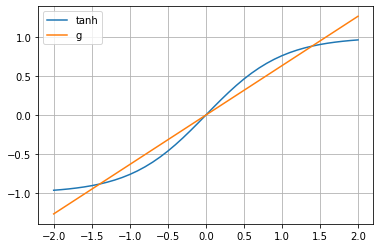

In [ ]:
# PLot
x_test = np.arange(-2, 2.1, 0.1)
plt.plot(x_test, np.tanh(x_test), label='tanh')
x_test_t = torch.tensor(x_test.reshape(-1, 1)).float()
plt.plot(x_test, linear_channel(x_test_t ).detach().numpy(), label='g')
plt.legend()
plt.grid()

### Problem 8.3 - Nonlinear model

* 1. Implement $g$ by a non-linear NN using several hidden layers with RelU activation.
* 2. Repeat the steps of Problem 8.2 for your non-linear model. How well does $g$ approximate $tanh$?

In [ ]:
class Channel(nn.Module):
    def __init__(self):
        super().__init__()
        self.net = nn.Sequential(
            nn.Linear(1, 10),
            nn.ReLU(),
            nn.Linear(10, 10),
            nn.ReLU(),
            nn.Linear(10, 10),
            nn.ReLU(),
            nn.Linear(10, 1)
        )
    
    def forward(self, x):
        return self.net(x)

In [ ]:
nonlinear_channel = Channel()
sigma2 = 0.007

n = 100_000
alphabet = np.array([-3, -1, 1, 3])
x = np.random.choice(alphabet, n)
gain = 0.5

y = tanh_channel(gain * x, sigma2)

train_model(nonlinear_channel, gain *x, y)

Epoch 0: loss=0.0070
Epoch 1: loss=0.0070
Epoch 2: loss=0.0070
Epoch 3: loss=0.0070
Epoch 4: loss=0.0070
Epoch 5: loss=0.0070
Epoch 6: loss=0.0070
Epoch 7: loss=0.0070
Epoch 8: loss=0.0070
Epoch 9: loss=0.0070


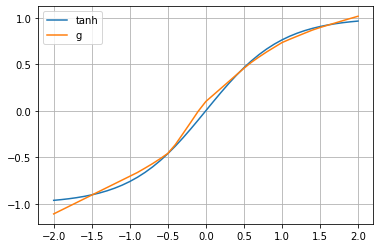

In [ ]:
# PLot
x_test = np.arange(-2, 2.1, 0.1)
plt.plot(x_test, np.tanh(x_test), label='tanh')
x_test_t = torch.tensor(x_test.reshape(-1, 1)).float()
plt.plot(x_test, nonlinear_channel(x_test_t ).detach().numpy(), label='g')
plt.legend()
plt.grid()

* 3. Repeat the steps of Problem 8.2 for your non-linear model using, using for $x_n$ zero
mean Gaussian samples with variance equal to the variance of $x_n$ in Problem 8.2.
How well does $g$ approximate $tanh$ now?

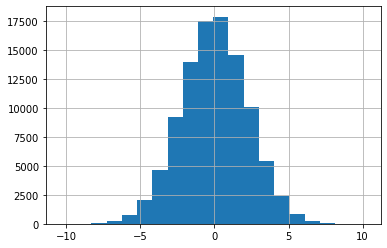

In [ ]:
# Gaussian input distribution
gain = 0.5
n = 100_000
var = 5
x = np.sqrt(var) * np.random.randn(n)
plt.hist(x, bins=20)
plt.grid()

In [ ]:
nonlinear_channel = Channel()
sigma2 = 0.007
y = tanh_channel(gain * x, sigma2)
train_model(nonlinear_channel, gain *x, y)

Epoch 0: loss=0.0054
Epoch 1: loss=0.0055
Epoch 2: loss=0.0056
Epoch 3: loss=0.0056
Epoch 4: loss=0.0057
Epoch 5: loss=0.0057
Epoch 6: loss=0.0057
Epoch 7: loss=0.0057
Epoch 8: loss=0.0057
Epoch 9: loss=0.0057


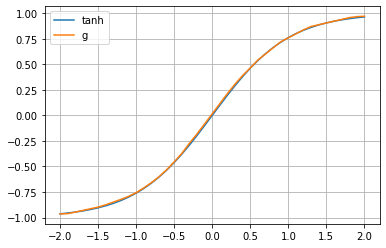

In [ ]:
# PLot
x_test = np.arange(-2, 2.1, 0.1)
plt.plot(x_test, np.tanh(x_test), label='tanh')
x_test_t = torch.tensor(x_test.reshape(-1, 1)).float()
plt.plot(x_test, nonlinear_channel(x_test_t).detach().numpy(), label='g')
plt.legend()
plt.grid()

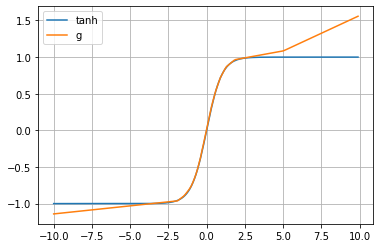

In [ ]:
# PLot
x_test = np.arange(-10, 10, 0.1)
plt.plot(x_test, np.tanh(x_test), label='tanh')
x_test_t = torch.tensor(x_test.reshape(-1, 1)).float()
plt.plot(x_test, nonlinear_channel(x_test_t).detach().numpy(), label='g')
plt.legend()
plt.grid()

### Problem 8.4 - Model-based transmitter design 

* 1. Train a mapper following Problem 6.2 using your model from Problem 8.3.
* 2. Evaluate your mapper on the true channel. How does it's performance compare to the performance of a mapper that is directly trained on the true channel?

In [ ]:
def awgn_channel(x, sigma2):
    noise = np.sqrt(sigma2) * torch.randn(len(x),1)
    return x + noise

In [ ]:
# Channel 
def tanh_channel(x, sigma2, seed=None):
    noise_t = np.sqrt(sigma2)*torch.randn(len(x),1)
    return torch.add(torch.tanh(x), noise_t)

In [ ]:
def one_hot(a, M):
    onehot = np.zeros(M)
    onehot[a] = 1
    return onehot

In [ ]:
# Transmitter and receiver NNs
class Transmitter(nn.Module):
    def __init__(self, M):
        super().__init__()
        self.lin1 = nn.Linear(M, 1)

    def forward(self, y):
        y = self.lin1(y)
        return y
    
class Receiver(nn.Module):
    def __init__(self, M):
        super().__init__()
        self.lin1 = nn.Linear(1, M)

    def forward(self, y):
        y = self.lin1(y)
        return y   

In [ ]:
# Create data
n = 100_000
M = 4
a = np.random.choice(range(M), size=n)
onehot = np.array([one_hot(a[i], M) for i in range(n)])
onehot_t = torch.tensor(onehot).float()
a_t = torch.tensor(a)
a_t = a_t.type(torch.LongTensor)

In [ ]:
# Loss function
loss_fn = nn.CrossEntropyLoss()

In [ ]:
# Training with the nonlinear channel model from 8.3
# Training loop
ces = []
snrdBs = [5, 10, 20]
for snrdB in snrdBs:
    print(f'--- SNR = {snrdB} dB ---')
    snr = 10**(snrdB/10)
    sigma2 = 1/snr
    
    tx = Transmitter(M)
    rx = Receiver(M)
    optimizer = optim.Adam(list(tx.parameters()) + list(rx.parameters()), lr=0.1)
    

    for j in range(1000):
        x = tx(onehot_t)
        y = nonlinear_channel(x.reshape(-1, 1))
        yy = awgn_channel(y, sigma2)
        l = rx(yy)
        loss = loss_fn(l, a_t)
        optimizer.zero_grad()
        loss.backward()
        optimizer.step()

        # Printout and visualization
        if j % 100 == 0:
            print(f'epoch {j}: Loss = {loss.detach().numpy()/np.log(2) :.4f}')
        if loss < 1e-3:
            break
    ces.append(loss.detach().numpy()/np.log(2))

--- SNR = 5 dB ---
epoch 0: Loss = 2.3845
epoch 100: Loss = 1.1741
epoch 200: Loss = 0.8613
epoch 300: Loss = 0.5431
epoch 400: Loss = 0.3674
epoch 500: Loss = 0.2557
epoch 600: Loss = 0.1768
epoch 700: Loss = 0.1296
epoch 800: Loss = 0.0992
epoch 900: Loss = 0.0757
--- SNR = 10 dB ---
epoch 0: Loss = 2.2636
epoch 100: Loss = 0.8267
epoch 200: Loss = 0.4580
epoch 300: Loss = 0.2267
epoch 400: Loss = 0.1386
epoch 500: Loss = 0.0910
epoch 600: Loss = 0.0642
epoch 700: Loss = 0.0497
epoch 800: Loss = 0.0372
epoch 900: Loss = 0.0295
--- SNR = 20 dB ---
epoch 0: Loss = 2.1383
epoch 100: Loss = 0.5643
epoch 200: Loss = 0.1683
epoch 300: Loss = 0.0628
epoch 400: Loss = 0.0324
epoch 500: Loss = 0.0200
epoch 600: Loss = 0.0138
epoch 700: Loss = 0.0103
epoch 800: Loss = 0.0080
epoch 900: Loss = 0.0064


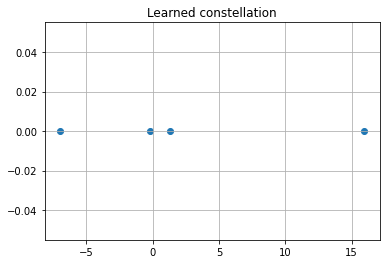

In [ ]:
# Constellation plot
a_plot = np.arange(M)
onehot_plot = np.array([one_hot(a_plot[i], M) for i in range(M)])
learned_x = tx(torch.tensor(onehot_plot).float())
plt.scatter(np.real(learned_x.detach().numpy()), np.imag(learned_x.detach().numpy()))
plt.title('Learned constellation')
plt.grid()

* Now we want to force the transmitter to take values only in the range where our channel model is actually trained.

In [ ]:
# Create data
M = 4
n = 100000
a = np.random.choice(range(M), size=n)
onehot = np.array([one_hot(a[i], M) for i in range(n)])
onehot_t = torch.tensor(onehot).float()
a_t = torch.tensor(a)
a_t = a_t.type(torch.LongTensor)

In [ ]:
def clip(x):
    v = torch.tensor([3])
    xx = torch.max(torch.min(x,v),-v)
    return xx

In [ ]:
# Training with the nonlinear channel model from 8.3
# Training loop
ces = []
snrdBs = [5,10,20]
for snrdB in snrdBs:
    print(f'--- SNR = {snrdB} dB ---')
    snr = 10**(snrdB/10)
    sigma2 = 1/snr
    
    tx = Transmitter(M)
    rx = Receiver(M)
    optimizer = optim.Adam(list(tx.parameters()) + list(rx.parameters()), lr=0.1)
    

    for j in range(5000):
        x = tx(onehot_t)
        x = clip(x)
        y = nonlinear_channel(x.reshape(-1, 1))
        yy = awgn_channel(y, sigma2)
        l = rx(yy)
        loss = loss_fn(l, a_t)
        optimizer.zero_grad()
        loss.backward()
        optimizer.step()

        # Printout and visualization
        if j % 1000 == 0:
            print(f'epoch {j}: Loss = {loss.detach().numpy()/np.log(2) :.4f}')
        if loss < 1e-3:
            break
    ces.append(loss.detach().numpy()/np.log(2))

--- SNR = 5 dB ---
epoch 0: Loss = 2.1176
epoch 1000: Loss = 1.1473
epoch 2000: Loss = 1.1449
epoch 3000: Loss = 1.1408
epoch 4000: Loss = 1.1419
--- SNR = 10 dB ---
epoch 0: Loss = 2.3357
epoch 1000: Loss = 0.7460
epoch 2000: Loss = 0.7431
epoch 3000: Loss = 0.7436
epoch 4000: Loss = 0.7462
--- SNR = 20 dB ---
epoch 0: Loss = 2.1262
epoch 1000: Loss = 0.0375
epoch 2000: Loss = 0.0163
epoch 3000: Loss = 0.0109
epoch 4000: Loss = 0.0079


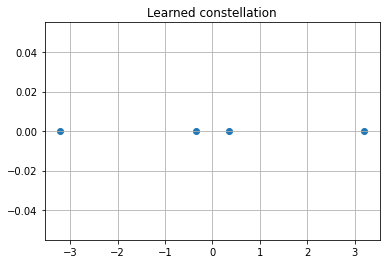

In [ ]:
# Constellation plot
a_plot = np.arange(M)
onehot_plot = np.array([one_hot(a_plot[i], M) for i in range(M)])
learned_x = tx(torch.tensor(onehot_plot).float())
plt.scatter(np.real(learned_x.detach().numpy()), np.imag(learned_x.detach().numpy()))
plt.title('Learned constellation')
plt.grid()

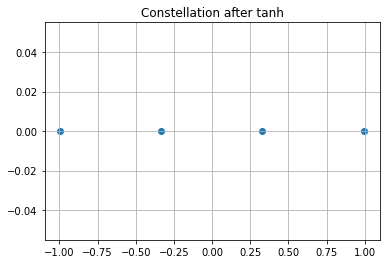

In [ ]:
yy_plot = torch.tanh(learned_x)
plt.scatter(np.real(yy_plot.detach().numpy()), np.imag(yy_plot.detach().numpy()))
plt.title('Constellation after tanh')
plt.grid()

* Now we train the mapper on the true channel.

In [ ]:
# Create data
M = 4
n = 100000
a = np.random.choice(range(M), size=n)
onehot = np.array([one_hot(a[i], M) for i in range(n)])
onehot_t = torch.tensor(onehot).float()
a_t = torch.tensor(a)
a_t = a_t.type(torch.LongTensor)

In [ ]:
# Training with the true channel
# Training loop
ces_true = []
snrdBs = [5,10,20]
for snrdB in snrdBs:
    print(f'--- SNR = {snrdB} dB ---')
    snr = 10**(snrdB/10)
    sigma2 = 1/snr
    
    tx = Transmitter(M)
    rx = Receiver(M)
    optimizer = optim.Adam(list(tx.parameters()) + list(rx.parameters()), lr=0.1)
    
    
    for j in range(5000):
        x = tx(onehot_t)
        y = tanh_channel(x, sigma2).float()
        l = rx(y)
        loss = loss_fn(l, a_t)
        optimizer.zero_grad()
        loss.backward()
        optimizer.step()

        # Printout and visualization
        if j % 1000 == 0:
            print(f'epoch {j}: Loss = {loss.detach().numpy()/np.log(2) :.4f}')
        if loss < 1e-3:
            break

    ces_true.append(loss.detach().numpy()/np.log(2))

--- SNR = 5 dB ---
epoch 0: Loss = 2.1861
epoch 1000: Loss = 1.1425
epoch 2000: Loss = 1.1386
epoch 3000: Loss = 1.1410
epoch 4000: Loss = 1.1425
--- SNR = 10 dB ---
epoch 0: Loss = 2.3995
epoch 1000: Loss = 0.7259
epoch 2000: Loss = 0.7213
epoch 3000: Loss = 0.7238
epoch 4000: Loss = 0.7286
--- SNR = 20 dB ---
epoch 0: Loss = 1.9286
epoch 1000: Loss = 0.0304
epoch 2000: Loss = 0.0125
epoch 3000: Loss = 0.0079
epoch 4000: Loss = 0.0058


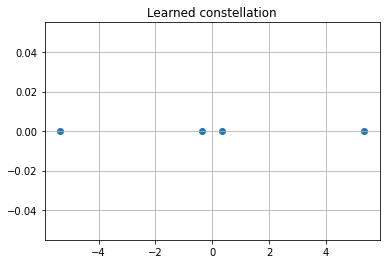

In [ ]:
# Constellation plot
a_plot = np.arange(M)
onehot_plot = np.array([one_hot(a_plot[i], M) for i in range(M)])
learned_x = tx(torch.tensor(onehot_plot).float())
plt.scatter(np.real(learned_x.detach().numpy()), np.imag(learned_x.detach().numpy()))
plt.title('Learned constellation')
plt.grid()

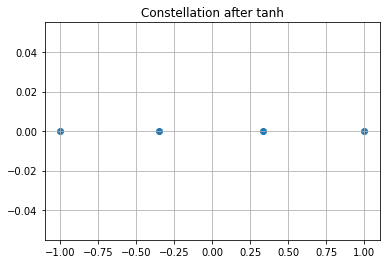

In [ ]:
yy_plot = torch.tanh(learned_x)
plt.scatter(np.real(yy_plot.detach().numpy()), np.imag(yy_plot.detach().numpy()))
plt.title('Constellation after tanh')
plt.grid()

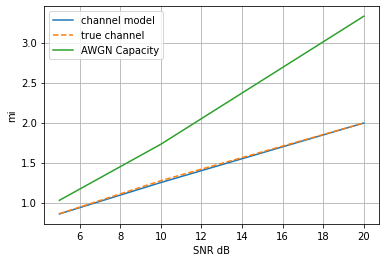

In [ ]:
# Plot
SNRs = 10**(np.array(snrdBs)/10)
plt.plot(snrdBs, np.log2(4)-ces, label = 'channel model')
plt.plot(snrdBs, np.log2(4)-ces_true, '--', label = 'true channel')
plt.plot(snrdBs, 0.5 * np.log2(1+ SNRs), label='AWGN Capacity')
plt.xlabel('SNR dB')
plt.ylabel('mi')
plt.legend()
plt.grid()